# **Tame Your Python**

Let's see how we can classify emails based on their contents

`Leggo`


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

In [0]:
def plot_dataset(X):
  plt.scatter(X[:,0], X[:,1])
  plt.show()

In [0]:
def evaluation_labels(y, y_pred):
  from sklearn import metrics
  adj_rand = metrics.adjusted_rand_score(y, y_pred)
  print("Adjusted Rand Score = " + str(adj_rand))

  adj_mi = metrics.adjusted_mutual_info_score(y, y_pred)
  print("Adjusted Mutual Information = " + str(adj_mi))

  h = metrics.homogeneity_score(y, y_pred)
  print("Homogeneity = " + str(h))

  v = metrics.v_measure_score(y, y_pred)
  print("V-measure = " + str(v))

  c = metrics.completeness_score(y, y_pred)
  print("Completeness = " + str(c))

  f = metrics.fowlkes_mallows_score(y, y_pred)
  print("Fowlkes-Mallows = " + str(f))

  return

def evaluation(X, y_pred):
  from sklearn import metrics 
  try: 
    s = metrics.silhouette_score(X, y_pred, metric='euclidean')
    print("Silhouette Coefficient = " + str(s))

    c = metrics.calinski_harabasz_score(X, y_pred)
    print("Calinski-Harabasz  = " + str(c))

    d = metrics.davies_bouldin_score(X, y_pred)
    print("Davies-Bouldin  = " + str(d))
  except:
    print("Model did not converge")

  return

In [0]:
def visual(c, X, y):
  from sklearn.cluster import MeanShift
  cluster_object = MeanShift()
  y_pred = cluster_object.fit_predict(X)
  colors = ['red', 'green', 'blue', 'cyan', 'black', 'yellow', 'magenta', 'brown', 'orange', 'silver', 'goldenrod', 'olive', 'dodgerblue']
  clusters = np.unique(y_pred)
  print("Cluster Labels")
  print(clusters)
  print("Evaluation")
  evaluation_labels(y, y_pred)
  evaluation(X, y_pred)
  for cluster in np.unique(y):
    row_idx = np.where(y == cluster)
    plt.scatter(X[row_idx, 0], X[row_idx, 1])
  plt.title('Dataset')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.legend()
  plt.show()
  for cluster in clusters:
    row_idx = np.where(y_pred == cluster)
    plt.scatter(X[row_idx, 0], X[row_idx, 1])
  plt.title('Clusters')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.legend()
  plt.show()

## Get the dataset

In [0]:
n = 1000
from sklearn.datasets import make_moons, make_blobs, make_circles, make_s_curve
X_moons, y_moons = make_moons(n_samples = n, noise=0.1)
X_blobs, y_blobs = make_blobs(n_samples = n, n_features = 2)
X_circles, y_circles = make_circles(n_samples=n, noise=0.1, factor = 0.4)
X_scurve, y_scurve = make_s_curve(n_samples=n, noise = 0.1)
X_random = np.random.random([n, 2])
y_random = np.random.randint(0,3,size = [n])
transformation = [[0.80834549, -0.83667341], [-0.20887718, 0.85253229]]
X_aniso = np.dot(X_blobs, transformation)
y_aniso = y_blobs

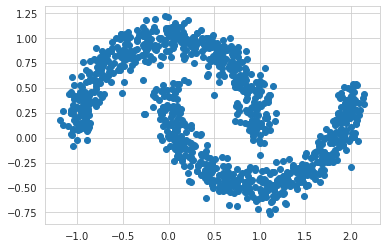

In [43]:
plot_dataset(X_moons)

No handles with labels found to put in legend.


Cluster Labels
[0]
Evaluation
Adjusted Rand Score = 0.0
Adjusted Mutual Information = 0.0
Homogeneity = 0.0
V-measure = 0.0
Completeness = 1.0
Fowlkes-Mallows = 0.7067527852789117
Model did not converge


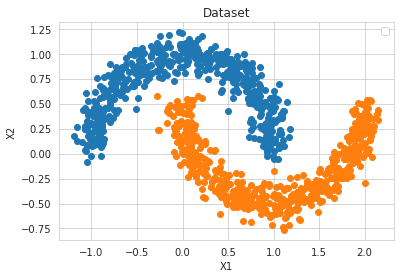

No handles with labels found to put in legend.


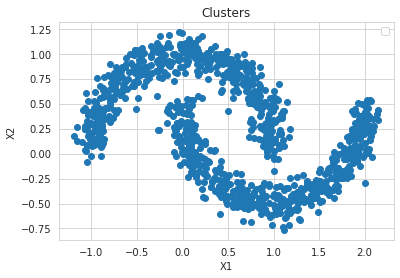

In [44]:
visual(2, X_moons, y_moons)

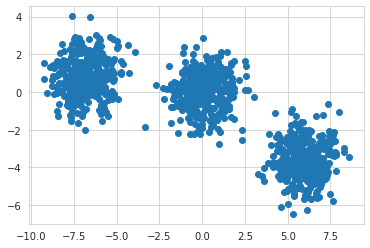

In [45]:
plot_dataset(X_blobs)

No handles with labels found to put in legend.


Cluster Labels
[0 1 2]
Evaluation
Adjusted Rand Score = 1.0
Adjusted Mutual Information = 1.0
Homogeneity = 1.0
V-measure = 1.0
Completeness = 1.0
Fowlkes-Mallows = 1.0
Silhouette Coefficient = 0.7334902037482387
Calinski-Harabasz  = 7785.060026027437
Davies-Bouldin  = 0.36307679561547285


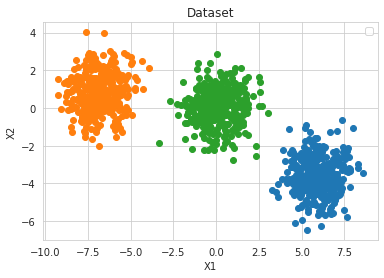

No handles with labels found to put in legend.


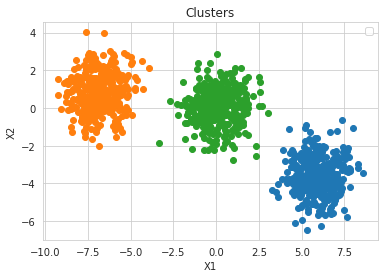

In [46]:
visual(3, X_blobs, y_blobs)

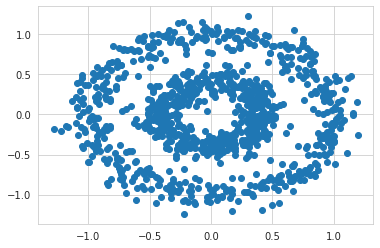

In [47]:
plot_dataset(X_circles)

No handles with labels found to put in legend.


Cluster Labels
[0]
Evaluation
Adjusted Rand Score = 0.0
Adjusted Mutual Information = 0.0
Homogeneity = 0.0
V-measure = 0.0
Completeness = 1.0
Fowlkes-Mallows = 0.7067527852789117
Model did not converge


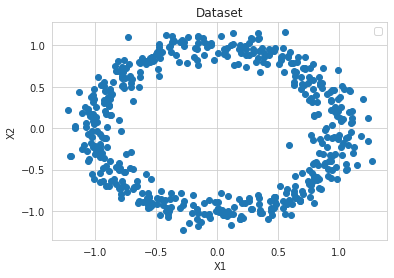

No handles with labels found to put in legend.


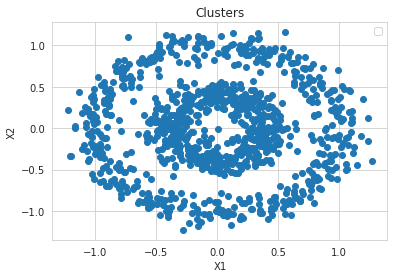

In [33]:
visual(2, X_circles, y_circles)

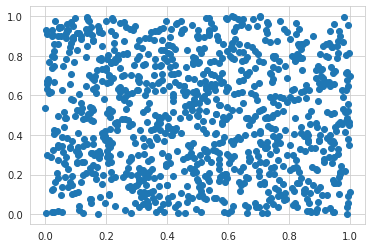

In [34]:
plot_dataset(X_random)

No handles with labels found to put in legend.


Cluster Labels
[0]
Evaluation
Adjusted Rand Score = 0.0
Adjusted Mutual Information = -1.578956779319121e-15
Homogeneity = -2.5264925424340884e-16
V-measure = -5.052985084868178e-16
Completeness = 1.0
Fowlkes-Mallows = 0.5767899849049797
Model did not converge


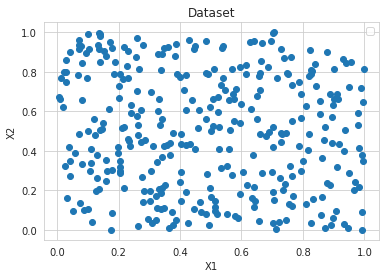

No handles with labels found to put in legend.


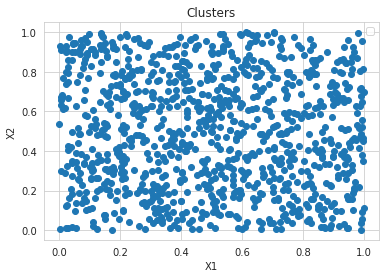

In [35]:
visual(3, X_random, y_random)

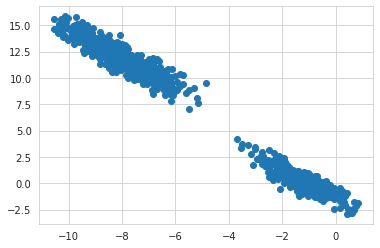

In [36]:
plot_dataset(X_aniso)

No handles with labels found to put in legend.


Cluster Labels
[0 1]
Evaluation
Adjusted Rand Score = 0.5705711831835333
Adjusted Mutual Information = 0.7332037453413733
Homogeneity = 0.5791701537780045
V-measure = 0.7335120314836225
Completeness = 0.9999999999999994
Fowlkes-Mallows = 0.7739764956678843
Silhouette Coefficient = 0.8386885562145108
Calinski-Harabasz  = 12115.56853796641
Davies-Bouldin  = 0.21345133562905563


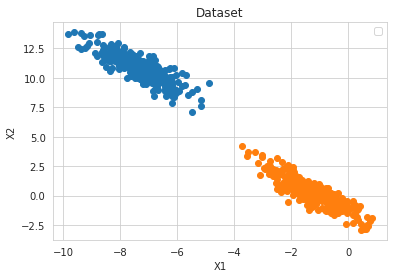

No handles with labels found to put in legend.


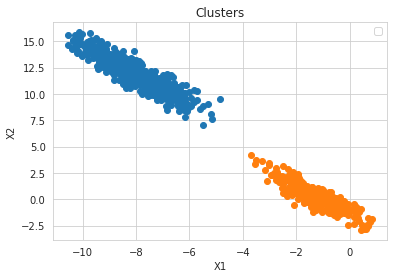

In [37]:
visual(3, X_aniso, y_aniso)